# Extraction de Keywords

## Imports

In [8]:
import os
import yake

## Extraire les mots clés d'un document avec Yake

In [9]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [10]:
# Lister les Fichiers
data_path = "../../data/camille_recession"
files = [f for f in os.listdir(data_path) if f.endswith('.txt')]

In [11]:
for f in sorted(files)[:999]:
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB1051_1924-06-24_01-00003.txt mentions these keywords: GÉNÉRAL HERTZOG, Parti communiste, Nouvelles Infernal, général Smuts, général Botha, partis communistes, Congrès mondial, parti nationaliste, Parti national-libéral, nouvelles élections, mouvement républicain, testament politique...
KB_JB1051_1924-08-06_01-00004.txt mentions these keywords: Editions Socialistes, BRUXELLES Compte, DRAPEAU ROUCD, HENRY DISPAN, Dimanche soir, SOCIALISTES BRUXELLES...
KB_JB1051_1924-10-26_01-00002.txt mentions these keywords: CENTRE Vondredi, Parti communiste, parti libéral, partis bourgeois, patrons intransigeants, classe ouvrière, Vondredi soir, usines métallurgiques, décidé d'organiser, intransigeants restent, parti catholique...
KB_JB1051_1925-09-22_01-00003.txt mentions these keywords: DRAPEAU ROÏÏGE, ROÏÏGE NOUVELLES, Cour Internationale, gouvernement turc, Comité central, Conseil Central, Conseils locaux...
KB_JB1051_1926-06-30_01-00001.txt mentions these keywords: TROISIEME ANNEE, fascistes

# Nuages de mots

## Imports

In [12]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zack\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Stopwords

In [13]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["paris", "ixelles", "bourg", "bel", "belgique", "ventes", "les", "plus", "cette", "cap", "app", "fait", "faire", "être", "deux", "comme", "dont", "tout", "lés", "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous", "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non", "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres", "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "tel", "tél", "rue", "bruxelles", "Bruxelles", "Brux", "brux", "maison", "lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche", "semaine", "ecrire", "bon", "ecr", "fille", "vendre", "louer", "demande", "femme", "place", "prix", "ans", "tres", "très", "heures", "heure", "midi", "grand", "cuit", "cuis", "sach", "des", "dès", "bonne", "peu", "nord", "chez", "mois", "servantes", "poste", "bons", "bon", "quart", "jours", "jour", "etc", "toute", "tout", "tous", "toutes", "vend", "près", "chaussée", "hier", "eau", "soir", "chambre", "belle", "leur", "leurs", "grand", "grande", "francs", "avenue", "suite", "petit", "quelques", "a", "à", "â", "abord", "afin", "ah", "ai", "aie", "ainsi", "allaient", "allo", "allô", "allons", "après", "assez", "attendu", "au", "aucun", "aucune", "aujourd", "aujourd'hui", "auquel", "aura", "auront", "aussi", "autre", "autres", "aux", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", "avec", "avoir", "ayant", "b", "bah", "beaucoup", "bien", "bigre", "boum", "bravo", "brrr", "c", "ça", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là", "celles", "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "cent", "cependant", "certain", "certaine", "certaines", "certains", "certes", "ces", "cet", "cette", "ceux", "ceux-ci", "ceux-là", "chacun", "chaque", "cher", "chère", "chères", "chers", "chez", "chiche", "chut", "ci", "cinq", "cinquantaine", "cinquante", "cinquantième", "cinquième", "clac", "clic", "combien", "comme", "comment", "compris", "concernant", "contre", "couic", "crac", "d", "da", "dans", "de", "debout", "dedans", "dehors", "delà", "depuis", "derrière", "des", "dès", "dés", "désormais", "desquelles", "desquels", "dessous", "dessus", "deux", "deuxième", "deuxièmement", 
       "devant", "devers", "devra", "différent", "différente", "différentes", "différents", "dire", "divers", "diverse", "diverses", "dix", "dix-huit", "dixième", "dix-neuf", "dix-sept", "doit", "doivent", "donc", "dont", "douze", "douzième", "dring", "du", "duquel", "durant", "e", "effet", "eh", "elle", "elle-même", "elles", "elles-mêmes", "en", "encore", "entre", "envers", "environ", 
       "es", "ès", "est", "et", "etant", "étaient", "étais", "était", "étant", "etc", "été", "etre", "être", "eu", "euh", "eux", "eux-mêmes", "excepté", "f", "façon", "fais", "faisaient", "faisant", "fait", "feront", "fi", "flac", "floc", "font", "g", "gens", "h", "ha", "hé", "hein", "hélas", "hem", "hep", "hi", "ho", "holà", "hop", "hormis", "hors", "hou", "houp", "hue", "hui", "huit", 
       "huitième", "hum", "hurrah", "i", "il", "ils", "importe", "j", "je", "jusqu", "jusque", "k", "l", "la", "là", "laquelle", "las", "le", "lequel", "les", "lès", "lesquelles", "lesquels", "leur", "leurs", "longtemps", "lorsque", "lui", "lui-même", "m", "ma", "maint", "mais", "malgré", "me", "même", "mêmes", "merci", "mes", "mien", "mienne", "miennes", "miens", "mille", "mince", "moi", 
       "moi-même", "moins", "mon", "moyennant", "n", "na", "ne", "néanmoins", "neuf", "neuvième", "ni", "nombreuses", "nombreux", "non", "nos", "notre", "nôtre", "nôtres", "nous", "nous-mêmes", "nul", "o", "o|", "ô", "oh", "ohé", "olé", "ollé", "on", "ont", "onze", "onzième", "ore", "ou", "où", "ouf", "ouias", "oust", "ouste", "outre", "p", "paf", "pan", "par", "parmi", "partant", 
       "particulier", "particulière", "particulièrement", "pas", "passé", "pendant", "personne", "peu", "peut", "peuvent", "peux", "pff", "pfft", "pfut", "pif", "plein", "plouf", "plus", "plusieurs", "plutôt", "pouah", "pour", "pourquoi", "premier", "première", "premièrement", "près", "proche", "psitt", "puisque", "q", "qu", "quand", "quant", "quanta", "quant-à-soi", "quarante", "quatorze", 
       "quatre", "quatre-vingt", "quatrième", "quatrièmement", "que", "quel", "quelconque", "quelle", "quelles", "quelque", "quelques", "quelqu'un", "quels", "qui", "quiconque", "quinze", "quoi", "quoique", "r", "revoici", "revoilà", "rien", "s", "sa", "sacrebleu", "sans", "sapristi", "sauf", "se", "seize", "selon", "sept", "septième", "sera", "seront", "ses", "si", "sien", "sienne", 
       "siennes", "siens", "sinon", "six", "sixième", "soi", "soi-même", "soit", "soixante", "son", "sont", "sous", "stop", "suis", "suivant", "sur", "surtout", "t", "ta", "tac", "tant", "te", "té", "tel", "telle", "tellement", "telles", "tels", "tenant", "tes", "tic", "tien", "tienne", "tiennes", "tiens", "toc", "toi", "toi-même", "ton", "touchant", "toujours", "tous", "tout", 
       "toute", "toutes", "treize", "trente", "très", "trois", "troisième", "troisièmement", "trop", "tsoin", "tsouin", "tu", "u", "un", "une", "unes", "uns", "v", "va", "vais", "vas", "vé", "vers", "via", "vif", "vifs", "vingt", "vivat", "vive", "vives", "vlan", "voici", "voilà", "vont", "vos", "votre", "vôtre", "vôtres", "vous", "vous-mêmes", "vu", "w", "x", "y", "z", "zut", "alors", 
       "aucuns", "bon", "devrait", "dos", "droite", "début", "essai", "faites", "fois", "force", "haut", "ici", "juste", "maintenant", "mine", "mot", "nommés", "nouveaux", "parce", "parole", "personnes", 
       "pièce", "plupart", "seulement", "soyez", "sujet", "tandis", "valeur", "voie", "voient", "état", "étions", "cour", "anvers", "vente", "serv", "centre", "lieu", "commerce", "salle", "matin", "porte", "mme", "homme", "hommes", "cuisine", "hom", "quartier", "pers", "personnes", "personne", "enf", "enfant", "enfants", "point", "jamais", "petite", "vie", "fort", "prés", "janvier", 
       "fevrier", "mars", "avril", "mai", "juin", "juillet", "août", "septembre", "octobre", "novembre", "décembre", "seul", "seule", "voir", "déjà", "vient", "beau", "belle", "beaux", "belles", "fin", 
       "gros", "chamb", "puis", "boulevard", "nouveau", "nouvelle", "nouveaux", "nouvelles", "dame", "dames", "demi", "journ", "fit", "donner", "fils", "garçon", "choix", "louer", "loué", "louée", "servante", "jeune", "général", "adr", "bne", "cert", "pet", "gaz", "jne", "temps", "agence", "notaire"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [14]:
# Choisir un année
year = '1920'

In [15]:
# Lister les fichiers de cette année
data_path = '../../data'
txt_path = '../../data/camille_recession'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f))]
len(txts)


944

In [16]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [17]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage

In [18]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [19]:
clean_text(year, folder=temp_path)

'Output has been written in ../../data/tmp/1920_clean.txt!'

In [20]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'INFERNAL CONGRES RAPPORT ZINOVIEV SÉANCE CONGRÈS MONDIAL INTERNATIONALE COMMUNISTE OUVERTE MOSCOU EXPOSÉ ORDRE ZINO VIEV PREND ACTIVITÉ TACTIQUE COMITÉ EXÉCUTIF OBJET LONGUE OVATION PART CONGRÈS DÉLÉGUÉS CHANTENT INTERNATIONALE CONGRÈS MONDIAL DÉCLARE ZINOVIEV MONTRER CHE MIN AVENIR REGARDER CHEMIN SUIVI LÉNINE MANQUE SITUATION INTERNATIONALE CONSIDÉRANT HISTOIRE INTERNATIONA ORATEUR CONSTATE PRE MIER CONGRÈS COMINTERN FOIR SOCIÉTÉ PROPAGANDE MÉCONTENTEMENT MASSES HOS TILIFÉ ÉGARD SOCIAL DÉMOCRA'

## Nuage de mots

### Afficher les termes les plus fréquents


In [21]:
frequencies = Counter(after.split())
print(frequencies.most_common(100))

[('GOUVERNEMENT', 5973), ('PAYS', 4630), ('GUERRE', 4408), ('MINISTRE', 3757), ('FRANCE', 3598), ('BELGE', 3485), ('PRÉSIDENT', 3380), ('COURS', 3337), ('POLITIQUE', 3170), ('CONSEIL', 3127), ('PART', 3037), ('QUESTION', 2982), ('ETAT', 2893), ('LONDRES', 2867), ('ALLEMAGNE', 2823), ('ORDRE', 2755), ('ETATS', 2562), ('PARTI', 2545), ('SITUATION', 2534), ('TRAVAIL', 2515), ('FRANÇAIS', 2465), ('SAINT', 2461), ('SOCIÉTÉ', 2443), ('MILLIONS', 2385), ('ROI', 2317), ('MONDE', 2287), ('VUE', 2199), ('LOI', 2183), ('MOMENT', 2170), ('PARTIE', 2162), ('DERNIER', 2146), ('COMMISSION', 2123), ('COMPTE', 2029), ('LIÈGE', 2009), ('NOMBRE', 1956), ('DROIT', 1955), ('MEMBRES', 1939), ('ANNÉE', 1918), ('COMITÉ', 1917), ('BELGES', 1853), ('NATIONALE', 1842), ('UNIS', 1821), ('NOM', 1813), ('PROJET', 1812), ('CHEF', 1792), ('OUVRIERS', 1774), ('ŒUVRE', 1773), ('PRIS', 1734), ('CONFÉRENCE', 1732), ('UNION', 1706), ('PEUPLE', 1703), ('CAS', 1691), ('FER', 1676), ('BERLIN', 1667), ('SERVICE', 1666), ('ACC

# Créer, stocker et afficher le nuage de mots

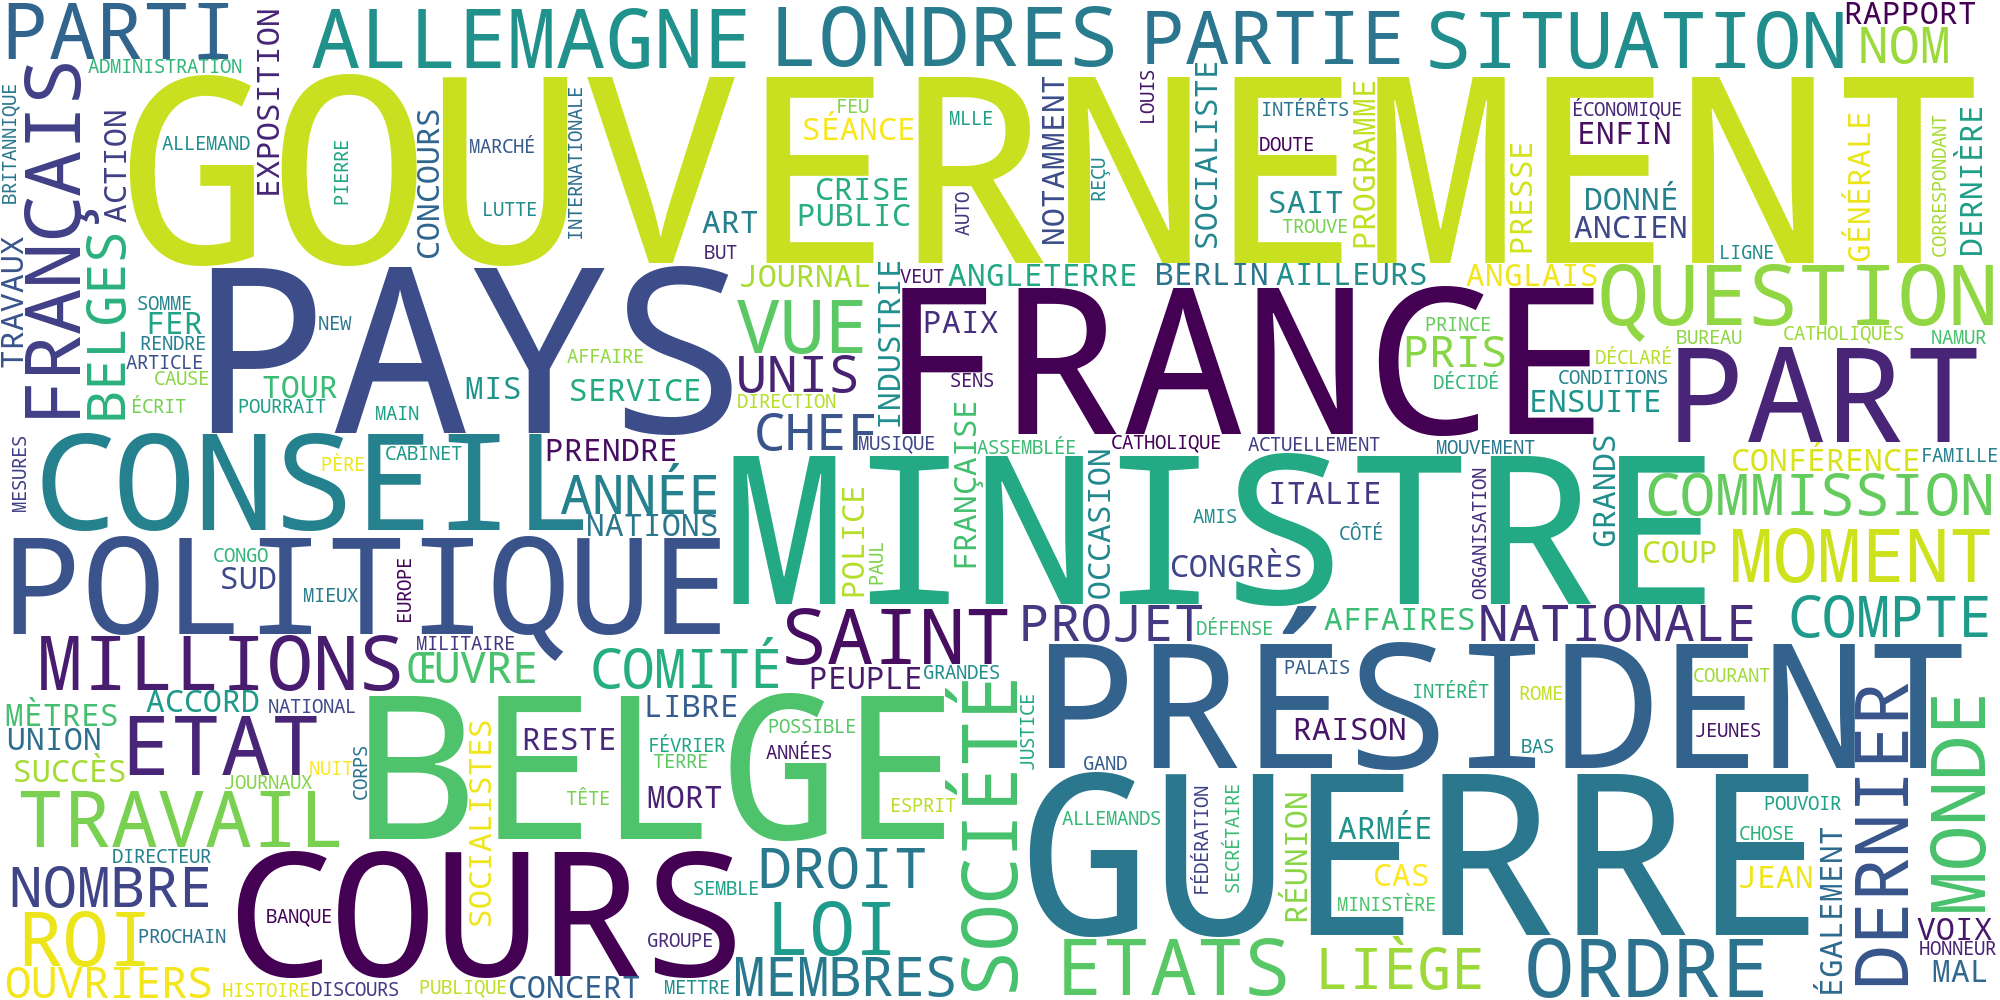

In [22]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

# Reconnaissance d'entités nommées avec SpaCy

## Imports

In [23]:
from collections import defaultdict
import spacy
from spacy.lang.fr.examples import sentences

In [24]:
nlp = spacy.load('fr_core_news_md')

## Appliquer la reconnaissance d'entités nommées sur notre corpus

In [25]:
# Charger le texte
lines = open("../../data/all_recession.txt", encoding='utf-8').readlines()

In [26]:
%%time
def process_large_text(nlp, text, chunk_size=500_000):
    """
    Process a large text safely with spaCy by splitting it into chunks.

    Args:
        nlp: spaCy Language object
        text: str, the full text to process
        chunk_size: int, number of characters per chunk

    Returns:
        List of Doc objects
    """
    docs = []
    for i in range(0, len(text), chunk_size):
        chunk = text[i:i+chunk_size]
        docs.append(nlp(chunk))
    return docs

# -----------------------
# Usage example
# -----------------------
nlp = spacy.load("fr_core_news_md")
text_path = "../../data/all_recession.txt"

# Read the full text
with open(text_path, encoding="utf-8") as f:
    text = f.read()

# Optional: increase max_length slightly if a single chunk may exceed default
nlp.max_length = max(len(text), nlp.max_length) + 1000

# Process in chunks
docs = process_large_text(nlp, text, chunk_size=500_000)

# Example: iterate over docs and print first token of each chunk
for idx, doc in enumerate(docs):
    print(f"Chunk {idx+1}, first token:", doc[0].text)


Chunk 1, first token: Nouvelles
Chunk 2, first token: t
Chunk 3, first token:  
Chunk 4, first token: eurs
Chunk 5, first token:  
Chunk 6, first token: es
Chunk 7, first token: yal
Chunk 8, first token:  
Chunk 9, first token: ecoud
Chunk 10, first token: u
Chunk 11, first token: filtrage
Chunk 12, first token:  
Chunk 13, first token: st
Chunk 14, first token:  
Chunk 15, first token: ra
Chunk 16, first token: u
Chunk 17, first token: faut
Chunk 18, first token: nale
Chunk 19, first token: ..
Chunk 20, first token: ne
Chunk 21, first token: lie
Chunk 22, first token: ,
Chunk 23, first token: politique
Chunk 24, first token: chevalier
Chunk 25, first token:  
Chunk 26, first token: z
Chunk 27, first token:  
Chunk 28, first token: nciations
Chunk 29, first token: êteté
Chunk 30, first token: tel
Chunk 31, first token: ,
Chunk 32, first token:  
Chunk 33, first token: faiblesse
Chunk 34, first token: nouvelle
Chunk 35, first token: ansformations
Chunk 36, first token: arié
Chunk 37, fi

In [27]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

# Liste

## Liste des personnes (PER) les plus mentionnées dans le corpus

In [28]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

M. Buyssens apparait 10 fois dans le corpus
Alexandre apparait 8 fois dans le corpus
Camille Aymard apparait 7 fois dans le corpus
M. Ouang apparait 4 fois dans le corpus
Van Beersel apparait 3 fois dans le corpus
Sir Frederick Leith-Ross apparait 3 fois dans le corpus
Stavisky apparait 3 fois dans le corpus
D. C. apparait 3 fois dans le corpus
M. Ruhemann apparait 3 fois dans le corpus
Kumps apparait 2 fois dans le corpus
M. Y. apparait 2 fois dans le corpus
Emilie Coudert apparait 2 fois dans le corpus
Olivier Plrard apparait 2 fois dans le corpus
Rand Mines apparait 1 fois dans le corpus
Mexlcan Eagle apparait 1 fois dans le corpus
Oll ordlnary apparait 1 fois dans le corpus
Sennah Rubber apparait 1 fois dans le corpus
Brltiflh apparait 1 fois dans le corpus
Nitrate Rallways apparait 1 fois dans le corpus
Kalping Chlnese Engineering apparait 1 fois dans le corpus
Amer apparait 1 fois dans le corpus
Nordd apparait 1 fois dans le corpus
Lloyd apparait 1 fois dans le corpus
Harpener ap

## Liste des lieux (LOC) les plus mentionnées dans le corpus

In [29]:
loc = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "LOC" and len(ent.text) > 3:
        loc[ent.text] += 1

sorted_loc = sorted(loc.items(), key=lambda kv: kv[1], reverse=True)

for loc, freq in sorted_loc[:50]:
    print(f"{loc} apparait {freq} fois dans le corpus")

Bruxelles apparait 12 fois dans le corpus
la Chine apparait 8 fois dans le corpus
Anvers apparait 7 fois dans le corpus
Liège apparait 7 fois dans le corpus
Paris apparait 7 fois dans le corpus
Heysel apparait 7 fois dans le corpus
Belgique apparait 6 fois dans le corpus
Berlin apparait 6 fois dans le corpus
Nankin apparait 6 fois dans le corpus
Allemagne apparait 5 fois dans le corpus
Bavière apparait 4 fois dans le corpus
Malines apparait 3 fois dans le corpus
Diest apparait 3 fois dans le corpus
Londres apparait 3 fois dans le corpus
Grande-Bretagne apparait 3 fois dans le corpus
Chine apparait 3 fois dans le corpus
Chine du Nord apparait 3 fois dans le corpus
Valenciennes apparait 3 fois dans le corpus
Tournai apparait 3 fois dans le corpus
Gand apparait 3 fois dans le corpus
Grenoble apparait 3 fois dans le corpus
rue des Archives apparait 3 fois dans le corpus
Kruschen apparait 3 fois dans le corpus
Schaerbeek apparait 2 fois dans le corpus
hôpital St-Pierre apparait 2 fois dans 

## Liste des organisations (ORG) les plus mentionnées dans le corpus

In [30]:
org = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "ORG" and len(ent.text) > 3:
        org[ent.text] += 1

sorted_org = sorted(org.items(), key=lambda kv: kv[1], reverse=True)

for org, freq in sorted_org[:50]:
    print(f"{org} apparait {freq} fois dans le corpus")

Shell apparait 5 fois dans le corpus
Kuomintang apparait 2 fois dans le corpus
Constitution apparait 2 fois dans le corpus
Times apparait 2 fois dans le corpus
Reich apparait 2 fois dans le corpus
GAND apparait 2 fois dans le corpus
CHUTE apparait 2 fois dans le corpus
Petroleum apparait 1 fois dans le corpus
Kuala Lumpur Rubber apparait 1 fois dans le corpus
Hydro Electric apparait 1 fois dans le corpus
Mexlcan Tramways Common apparait 1 fois dans le corpus
Deutsche Bank apparait 1 fois dans le corpus
Chevalier apparait 1 fois dans le corpus
STOCK EXCHANQE apparait 1 fois dans le corpus
Allled Chem apparait 1 fois dans le corpus
American Tobac B apparait 1 fois dans le corpus
Corn Products apparait 1 fois dans le corpus
General Ford apparait 1 fois dans le corpus
Intern apparait 1 fois dans le corpus
PublI- apparait 1 fois dans le corpus
Union Carb apparait 1 fois dans le corpus
United Gaz Impr apparait 1 fois dans le corpus
U.S.Indust apparait 1 fois dans le corpus
United States appa

# Sentiment analysis 

### Imports

In [31]:
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

### Création d'une fonction `get_sentiment`

In [32]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity_perc}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

# Analyser le sentiment d'une phrase

In [33]:
sentence1="En raison de la situation des changes, les prix indiqués ci-dessus sont provisoirement majorés de 40 pour cent."
sentence2="Aucun prétexte, aucun sophisme, aucun paradoxe de nécessité' ne lui fera admettre l'idée, ni courir le risque de devenir le satellite jd'une autre puissance, celle-ci fût-elle notre généreuse alliée de la guerre d'hier, notre alliée indispensable de «la guerre de demain, au demeurant noire excellente voisine et notre meilleure «amie. Les Belges forment une nation indépendante; ils ne se prêteront à rien de ce qui les exposerait à ne pas le rester. »"
sentence3="De source officieuse, on dit que la visite de la commission des réparations est attendue, à Berlin, avec calme, et sans grande espérance."
sentence4="La « Germania » (centre) dit que l'on ignore encore la proposition de la commission mais qu'il faut, dès à présent, se garder contre l'erreur d'Imposer un contrôle financier dans un pays qui est « économiquement vide ». La situation économique de l'Allemagne et le problème du mark ne peuvent être résolus sans que l'on donne au pays le temps de reprendre haleine et sans que l'on diminue les préparations qui lui sont pas ici seulement d'une crise allemande; la crise est mon Mondiale."
sentence5="Le 4 mars 1918, des officiers allemands l'arrêtent, dans son cabinet, à l'hûtel de ville. Il est, jusqu'au 19 du même mois, enfermé dans la caserne des Prédicateurs, puis transféré à la prison de Bonn où il est condamné à deux mois de détention."
sentence6="Il est désirable, d'autre part, que l'on sache en Allemagne que la conférence ne peut avoir de résultat que si l'Allemagne est disposée à entrer dans la Société des Nations"
sentence7="Si les forcenés du Ku Klux Klan étaient capables de logique, ils n'admettraient comme membres de cette organisation dont ils s'exclueraient du même coup, que les seuls authentiques « américains cent pour cent », c'est-à-dire les Indiens."
sentence8="En présence des concurrents réellement formidables, il n'est pas possible, dit le rapport au Roi, que nos producteurs continuent do lutter, comme c'est souvent le cas, en ordre dispersé."
sentence9="Trois bandits, au visage noirci, se sont introduits, l'avant-dernière nuit, dans la maison du fermier Cyrille Van Acker, à Lokeren."
sentence10="L’archevêque de Canterbury approuve l'accord anglo-irlandais."

In [34]:
get_sentiment(sentence1)
get_sentiment(sentence2)
get_sentiment(sentence3)
get_sentiment(sentence4)
get_sentiment(sentence5)
get_sentiment(sentence6)
get_sentiment(sentence7)
get_sentiment(sentence8)
get_sentiment(sentence9)
get_sentiment(sentence10)

This text is 5% negative and perfectly objective.
This text is 28% positive and 34% subjective.
This text is 1% positive and 28% subjective.
This text is 2% positive and 16% subjective.
This text is neutral and 25% subjective.
This text is neutral and 30% subjective.
This text is 7% positive and 22% subjective.
This text is 42% positive and 60% subjective.
This text is neutral and perfectly objective.
This text is neutral and perfectly objective.


# Clustering de documents

## Imports

In [35]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [36]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Zack\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Zack\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [37]:
data_path = "../../data/camille_recession"

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [38]:
files = [f for f in sorted(os.listdir(data_path))]

In [39]:
texts = [open(os.path.join(data_path, f), "r", encoding="utf-8").read() for f in files]

## Vectoriser les documents à l'aide de TF-IDF

In [40]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [41]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [42]:
tfidf_vectors = vectorizer.fit_transform(texts)

d:\Cours_ULB\Traitement_automatique_de_Corpus\tac\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


### Imprimer le vecteur tf-IDF du premier document

In [43]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

nationalistes    0.192890
juin             0.187008
république       0.186231
communiste       0.173628
élections        0.165236
                   ...   
hongrie          0.000000
honneur          0.000000
hors             0.000000
ht               0.000000
#                0.000000
Length: 3722, dtype: float64

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

### Définir un nombre de clusters

In [73]:
N_CLUSTERS = 14

### Instancier le modèle K-Means et ses arguments

In [74]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [75]:
clusters = km_model.fit_predict(tfidf_vectors)

In [76]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA

In [77]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

# Générer le plot

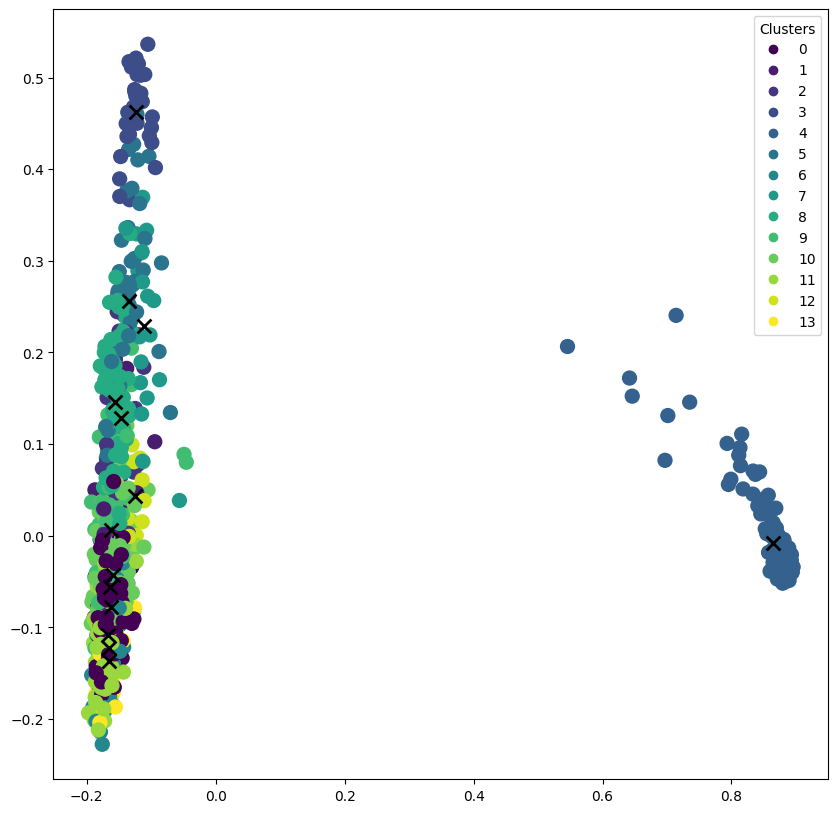

In [78]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

# Top terms

In [79]:

import numpy as np
import pandas as pd

def get_top_terms_per_cluster(X_tfidf, labels, vectorizer, n_top=20):
    """
    Calcule les top termes TF-IDF par cluster, indépendamment du nombre de clusters.

    Paramètres
    ---------
    X_tfidf : scipy.sparse matrix (shape: n_docs x n_terms)
        Matrice TF-IDF produite par TfidfVectorizer.fit_transform(...)
    labels  : array-like (shape: n_docs,)
        Étiquettes de cluster (ex: issues de KMeans.fit_predict(...))
    vectorizer : TfidfVectorizer (déjà fit)
        Sert à récupérer les noms de termes via get_feature_names_out()
    n_top   : int
        Nombre de termes à extraire par cluster

    Retour
    ------
    df_top : pandas.DataFrame
        Colonnes: [cluster, rang, terme, score]
    """
    terms = np.array(vectorizer.get_feature_names_out())
    labels = np.asarray(labels)
    clusters_unique = np.unique(labels)

    rows = []
    for c in clusters_unique:
        doc_idx = np.where(labels == c)[0]
        if len(doc_idx) == 0:
            continue

        # Moyenne TF-IDF du cluster (robuste pour clusters denses)
        mean_vec = X_tfidf[doc_idx].mean(axis=0).A1  # -> 1D np.array de taille n_terms

        # Indices des n meilleurs termes
        top_idx = np.argsort(mean_vec)[::-1][:n_top]

        # Ajout au résultat
        for rank, idx in enumerate(top_idx, start=1):
            rows.append({
                "cluster": c,
                "rang": rank,
                "terme": terms[idx],
                "score": mean_vec[idx]
            })

    df_top = pd.DataFrame(rows)
    return df_top


# --- Utilisation avec tes objets existants ---
df_top = get_top_terms_per_cluster(tfidf_vectors, clusters, vectorizer, n_top=20)

# Aperçu lisible à la console (top 10 par cluster)
for c, bloc in df_top.groupby("cluster"):
    print(f"\n=== Cluster {c} : top 10 termes ===")
    print(bloc.head(10)[["rang", "terme", "score"]].to_string(index=False))

# (Optionnel) Export CSV
df_top.to_csv("top_terms_by_cluster.csv", index=False, encoding="utf-8")



=== Cluster 0 : top 10 termes ===
 rang        terme    score
    1  socialistes 0.056954
    2   socialiste 0.052003
    3 travailleurs 0.042164
    4      congrès 0.040739
    5     ouvrière 0.035958
    6     salaires 0.034759
    7           dc 0.033447
    8        grève 0.033411
    9       classe 0.033060
   10          mai 0.032921

=== Cluster 1 : top 10 termes ===
 rang       terme    score
    1     juillet 0.091498
    2      budget 0.061527
    3  convention 0.045304
    4        vote 0.045259
    5 distinction 0.043645
    6 socialistes 0.040808
    7  discussion 0.039089
    8        août 0.038106
    9 catholiques 0.036318
   10          dc 0.036241

=== Cluster 2 : top 10 termes ===
 rang   terme    score
    1      id 0.130552
    2      ld 0.103038
    3 février 0.070563
    4  tonnes 0.069451
    5     1/2 0.064443
    6    .... 0.054771
    7    mars 0.049376
    8  marché 0.047166
    9      .— 0.045930
   10 janvier 0.045881

=== Cluster 3 : top 10 termes ===
 r